<a href="https://colab.research.google.com/github/Belvanz/proyek-analisis-data/blob/main/Another_copy_of_Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Belvan Savero Achmady]
- **Email:** [belvansavero049@gmail.com]
- **ID Dicoding:** [MS106D5Y0529]

## Menentukan Pertanyaan Bisnis

1. Seberapa besar pengaruh suhu terhadap jumlah peminjaman sepeda?
2. Kapan waktu terbaik bagi operator untuk menambah jumlah sepeda?

## Import Semua Packages/Library yang Digunakan

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [18]:
# Memuat Dataset
day_df = pd.read_csv("https://raw.githubusercontent.com/Belvanz/proyek-analisis-data/refs/heads/main/Bike-sharing-dataset/day.csv")

# Menampilkan 5 baris pertama pada Dataset
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
# Memuat Dataset
hour_df = pd.read_csv("https://raw.githubusercontent.com/Belvanz/proyek-analisis-data/refs/heads/main/Bike-sharing-dataset/hour.csv")

# Menampilkan 5 baris pertama pada Dataset
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Memuat dua dataset yaitu dataset day.csv dan hour.csv.
- Menampilkan 5 baris pertama pada setiap dataset.

### Assessing Data

In [20]:
# Menampilkan informasi tentang Dataset
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [21]:
# Menampilkan informasi tentang Dataset
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [26]:
# Memeriksa duplikasi data di data Day
day_duplicates = day_df.duplicated().sum()
print(f"Jumlah duplikasi di Day Data: {day_duplicates}")

# Memeriksa duplikasi data di data Hour
hour_duplicates = hour_df.duplicated().sum()
print(f"Jumlah duplikasi di Hour Data: {hour_duplicates}")

Jumlah duplikasi di Day Data: 0
Jumlah duplikasi di Hour Data: 0


In [27]:
# Memeriksa missing values di data Day
print(day_df.isnull().sum())
print("Missing values in Day Data:")

# Memeriksa missing values di data Hour
print(hour_df.isnull().sum())
print("\nMissing values in Hour Data:")

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Missing values in Day Data:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values in Hour Data:


In [30]:
# Memeriksa parameter statistik
day_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [31]:
# Memeriksa parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak terdapat duplikasi data.
- Tidak terdapat missing value.

### Cleaning Data

In [ ]:
day_df.drop_duplicates(inplace=True)

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

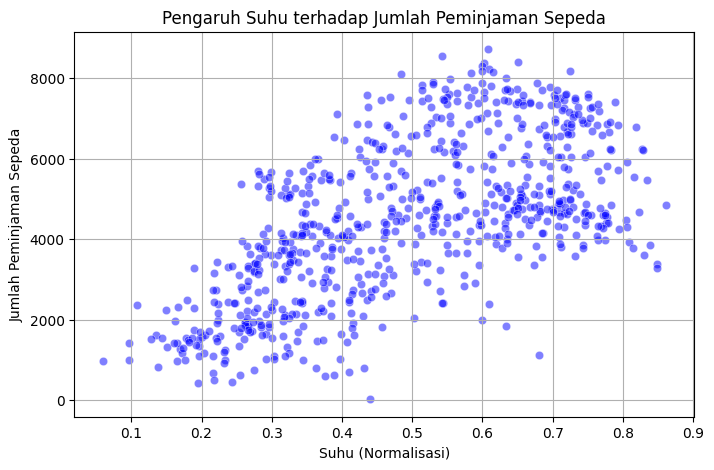

In [6]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="temp", y="cnt", data=day_df, alpha=0.5, color="blue")
plt.title("Pengaruh Suhu terhadap Jumlah Peminjaman Sepeda")
plt.xlabel("Suhu (Normalisasi)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.grid(True)
plt.show()

### Pertanyaan 2:

<ipython-input-7-b5a250d8df43>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hr", y="cnt", data=hour_df, ci=None, marker="o", color="red")


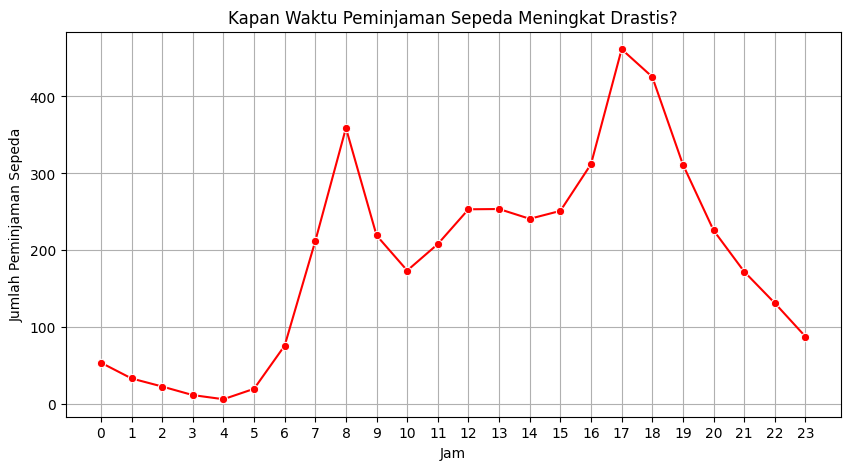

In [7]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="hr", y="cnt", data=hour_df, ci=None, marker="o", color="red")
plt.title("Kapan Waktu Peminjaman Sepeda Meningkat Drastis?")
plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2